### **CSE468.1 Assignment**

**Author:** Nesar (based on fchollet's MNIST example)

**Description:** Trains a CNN on CIFAR-10 or CIFAR-100 and automatically generates accuracy/loss plots for different hyperparameters.

# **Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.datasets import cifar10, cifar100

# **Dataset**

In [2]:
DATASET = "cifar10"   # or "cifar100"

# **Load and prepare the data**

In [3]:
if DATASET == "cifar10":
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    num_classes = 10
elif DATASET == "cifar100":
    (x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode="fine")
    num_classes = 100
else:
    raise ValueError("Invalid dataset name! Use 'cifar10' or 'cifar100'.")

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

input_shape = x_train.shape[1:]
print(f"Dataset: {DATASET}")
print("Input shape:", input_shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Dataset: cifar10
Input shape: (32, 32, 3)
50000 train samples
10000 test samples


# **Build the model function**

In [4]:
def build_model(dropout_rate=0.5, learning_rate=1e-3):
    model = keras.Sequential([
        keras.Input(shape=input_shape),

        # Block 1
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(dropout_rate / 2),

        # Block 2
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(dropout_rate),

        # Dense layers
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(num_classes, activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

# **Function to plot training history**

In [5]:
def plot_history(history, label, color):
    plt.plot(history.history["val_accuracy"], color=color, linestyle='--', label=f'Val Acc - {label}')
    plt.plot(history.history["accuracy"], color=color, label=f'Train Acc - {label}')

# **Run multiple experiments automatically**

In [6]:
experiments = [
    {"dropout_rate": 0.3, "learning_rate": 0.001},
    {"dropout_rate": 0.5, "learning_rate": 0.001},
    {"dropout_rate": 0.5, "learning_rate": 0.0005},
]

batch_size = 128
epochs = 10

colors = ['tab:blue', 'tab:orange', 'tab:green']
histories = []

for i, params in enumerate(experiments):
    print(f"\n===== Running experiment {i+1} with dropout={params['dropout_rate']}, lr={params['learning_rate']} =====")
    model = build_model(dropout_rate=params["dropout_rate"], learning_rate=params["learning_rate"])
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.1,
        verbose=1
    )
    histories.append((history, params, colors[i]))

    # Evaluate on test data
    score = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy (Exp {i+1}): {score[1]:.4f}")


===== Running experiment 1 with dropout=0.3, lr=0.001 =====
Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.2820 - loss: 2.0235 - val_accuracy: 0.2504 - val_loss: 2.0792
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4903 - loss: 1.4057 - val_accuracy: 0.5512 - val_loss: 1.2872
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5817 - loss: 1.1707 - val_accuracy: 0.6624 - val_loss: 0.9192
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6431 - loss: 1.0063 - val_accuracy: 0.6974 - val_loss: 0.8682
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6842 - loss: 0.9098 - val_accuracy: 0.7340 - val_loss: 0.7762
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7074 - loss: 0.8383 - val_accuracy: 0.7310 - val_loss: 0.7615
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7268 - loss: 0.7907 - val_accuracy: 0.7292 - val_loss: 0.7706
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━

# **Plot accuracy comparison**

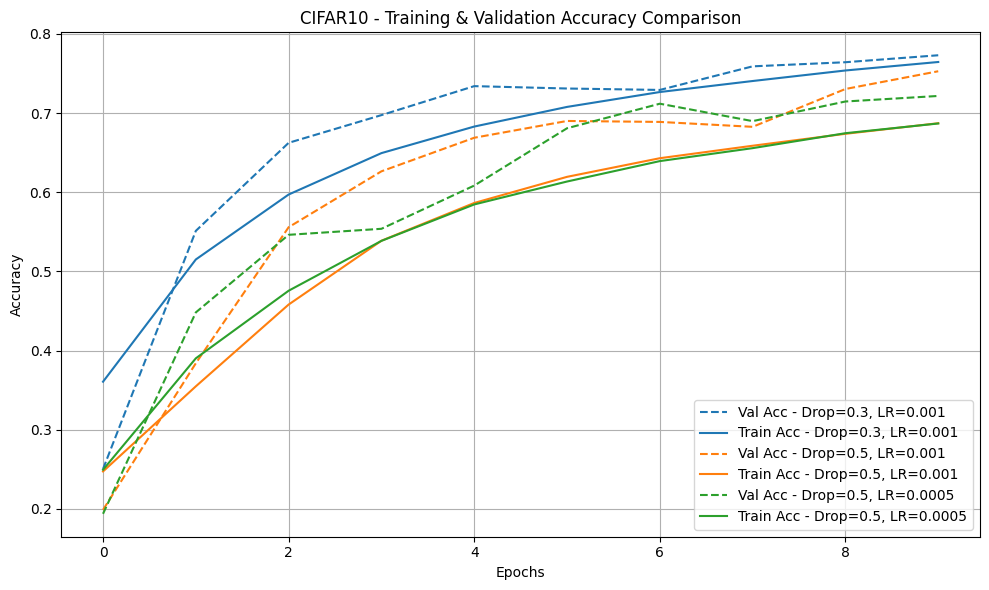

In [7]:
plt.figure(figsize=(10,6))
for history, params, color in histories:
    label = f"Drop={params['dropout_rate']}, LR={params['learning_rate']}"
    plot_history(history, label, color)

plt.title(f"{DATASET.upper()} - Training & Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{DATASET}_accuracy_comparison.png")
plt.show()

# **Plot loss comparison**

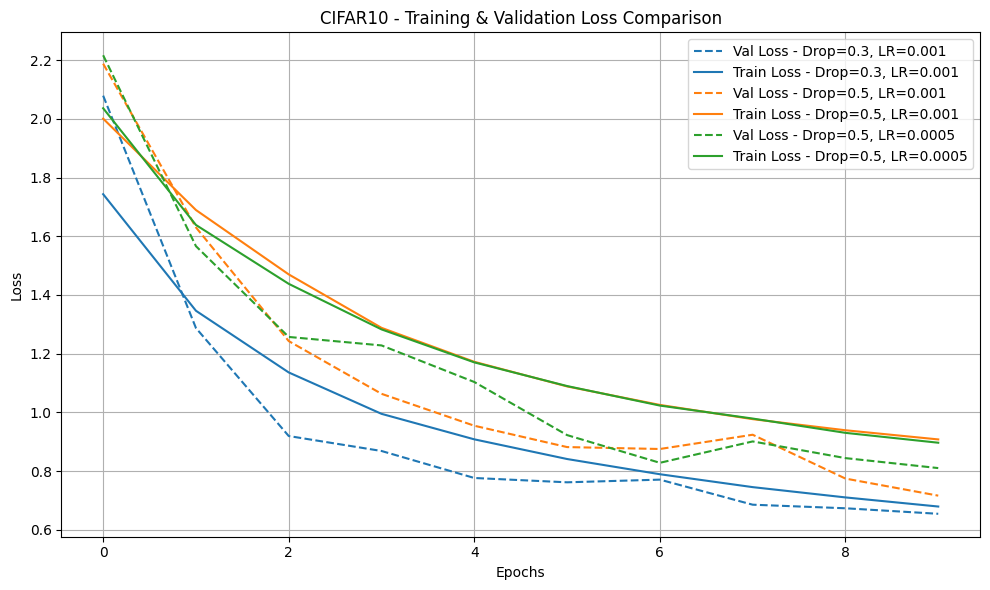

In [8]:
plt.figure(figsize=(10,6))
for history, params, color in histories:
    label = f"Drop={params['dropout_rate']}, LR={params['learning_rate']}"
    plt.plot(history.history["val_loss"], color=color, linestyle='--', label=f'Val Loss - {label}')
    plt.plot(history.history["loss"], color=color, label=f'Train Loss - {label}')

plt.title(f"{DATASET.upper()} - Training & Validation Loss Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{DATASET}_loss_comparison.png")
plt.show()